In [7]:

from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym


# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterFull"]
mycol = mydb["s_m_a_r_t_att_full"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
myfieldsSMARTAtt = {"disk_id":1, "p_failedB":1, "n_b_written":1, "_id":0}

mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# %%
dfSMARTAtt["model_y"] = "B2"

# %%
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [3]:
# REMOVE ZERO VALUES AS THEY ARE AFFECTING THE KDE RESULTS

#result.drop(result[result.w_r_d < 10].index, inplace=True)
#result.drop(result[result.r_sectors < 10].index, inplace=True)
result.drop(result[result.u_errors < 10].index, inplace=True)

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

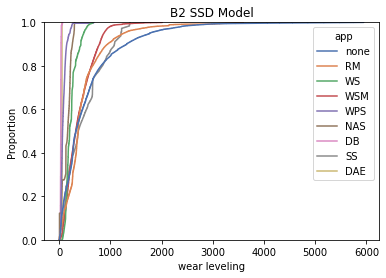

In [158]:
graph = sns.ecdfplot(x = "w_r_d", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", title ='B2 SSD Model')

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

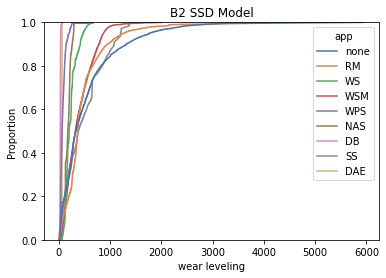

In [10]:
# removing < 10

graph = sns.ecdfplot(x = "w_r_d", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", title ='B2 SSD Model')

[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

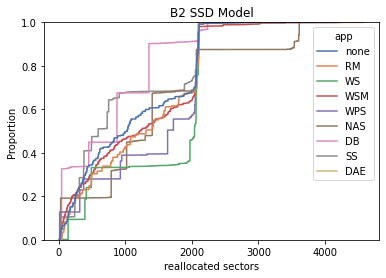

In [159]:
graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

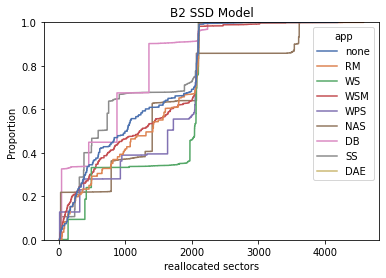

In [11]:
# removing < 10

graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

In [10]:
result.loc[result["app"] == "WS", "u_errors"].max()

181185.0

In [4]:
result.drop(result[result.u_errors < 1].index, inplace=True)

[Text(0.5, 0, 'Uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

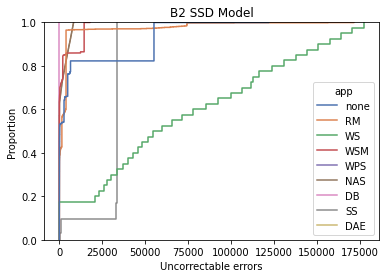

In [14]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

graph = sns.ecdfplot(x = "u_errors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Uncorrectable errors", title ='B2 SSD Model')

In [2]:
result.drop(result[result.p_failedB < 1].index, inplace=True)

[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

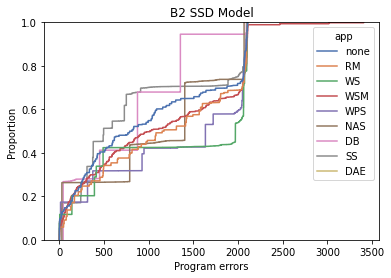

In [3]:
graph = sns.ecdfplot(x = "p_failedB", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

In [5]:
result.drop(result[result.n_b_written < 1].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

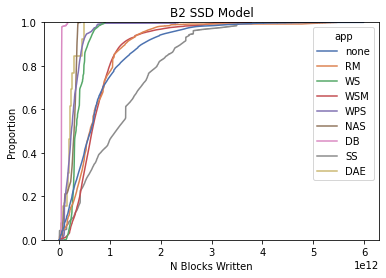

In [6]:
graph = sns.ecdfplot(x = "n_b_written", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'Erase errors'), Text(0.5, 1.0, 'B2 SSD Model')]

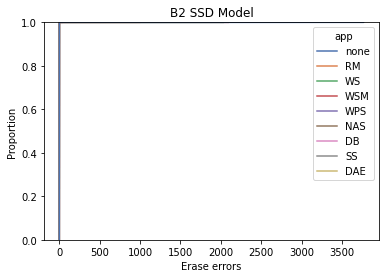

In [3]:
graph = sns.ecdfplot(x = "e_failedB", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Erase errors", title ='B2 SSD Model')

Removing values equal to zero as they are negatively affecting KDE

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

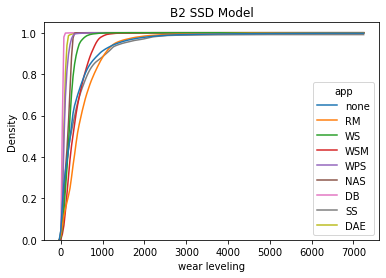

In [3]:
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

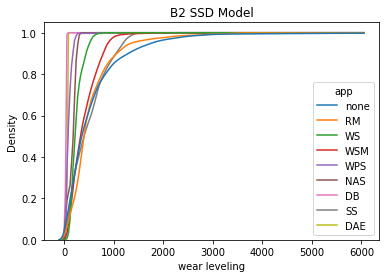

In [7]:
# removing < 0
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

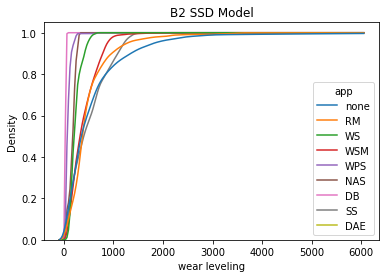

In [12]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

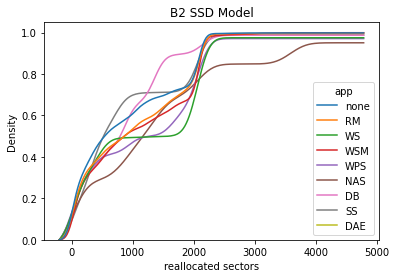

In [8]:
# removing < 0

graph = sns.kdeplot(
    data=result, x="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

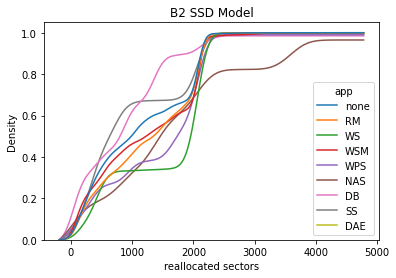

In [13]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

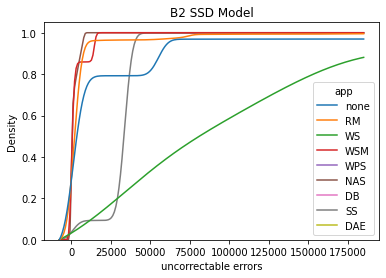

In [15]:
graph = sns.kdeplot(
    data=result, x="u_errors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "uncorrectable errors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

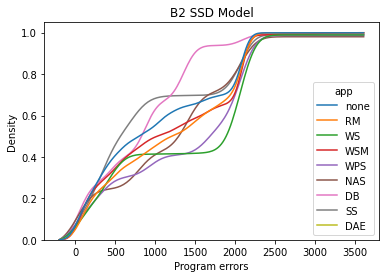

In [4]:
graph = sns.kdeplot(
    data=result, x="p_failedB", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

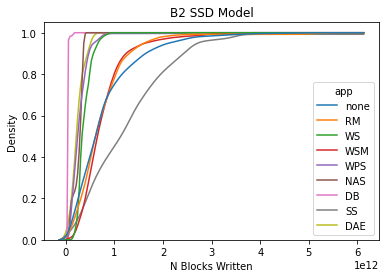

In [7]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

In [ ]:
## agrupar qualquer metrica por dia (tirar a media do dia por exemplo)... para plotar uma contra a outra ... ou criar uma nova coluna para investigar relacoes (ex: Program error/write rate)

resultProgramError = result.groupby(['timestamp'], as_index=False)['p_failedB'].mean()

In [8]:
result.head()

,disk_id,p_failedB,n_b_written,model_y,app
0,19207.0,NaN,NaN,B2,none
1,19207.0,NaN,NaN,B2,none
2,19207.0,0.0,5.084690e+09,B2,none
3,19207.0,0.0,5.084690e+09,B2,none
4,19207.0,0.0,5.084690e+09,B2,none


In [ ]:
maxWearValue = result["n_b_written"].max()
bin=np.arange(0,maxWearValue,1000)
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=result, palette="Set1", markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], x_estimator=np.mean, x_ci="ci", x_bins=bin, ci=None, fit_reg=False, truncate=True, scatter=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')